Expoloratory data analysis

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
df = pd.read_csv('./dataset/data.csv')
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2070,Mercedes-Benz,C-Class,2015,premium unleaded (required),201.0,4.0,AUTOMATIC,rear wheel drive,2.0,Luxury,Compact,Coupe,31,22,617,39400
8606,Kia,Rondo,2009,regular unleaded,175.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Wagon,27,20,1720,17495
2394,Volkswagen,CC,2015,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,31,22,873,34095
506,BMW,5 Series Gran Turismo,2015,premium unleaded (required),445.0,8.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury,Performance",Large,4dr Hatchback,24,16,3916,71400
5817,Chevrolet,Impala Limited,2015,flex-fuel (unleaded/E85),300.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Large,Sedan,30,18,1385,26840


In [287]:
len(df)

11914

In [288]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [289]:
# replacing all spaces with underscores and lowercase all letters
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [291]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [292]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


<AxesSubplot:xlabel='msrp', ylabel='Count'>

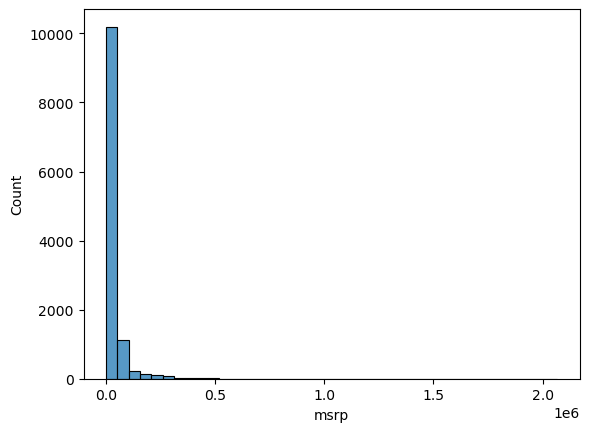

In [293]:
sns.histplot(df.msrp, bins=40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

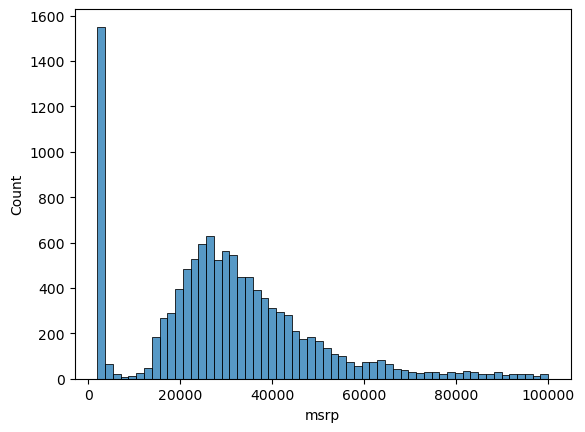

In [294]:
sns.histplot(df.msrp[df.msrp < 100000])

In [295]:
# applying log transformation
log_price = np.log1p(df.msrp)
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

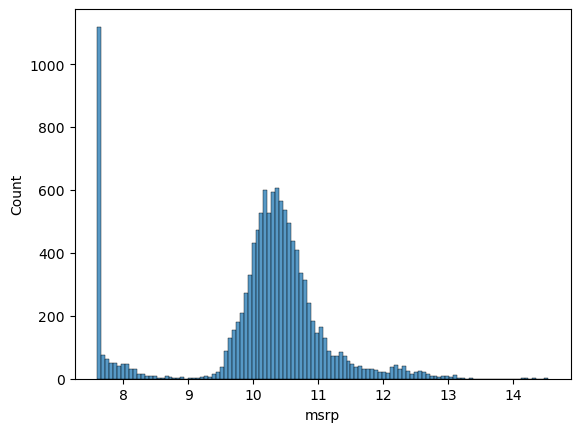

In [296]:
sns.histplot(log_price)

In [297]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [298]:
n = len(df)
n

11914

In [299]:
n_val = int(0.2 * n)
n_val

2382

In [300]:
n_test = int(0.2 * n)
n_test

2382

In [301]:
n_train = n - (n_val + n_test)
n_train

7150

In [302]:
np.random.seed(2)
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [303]:
np.random.shuffle(idx)

In [304]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [305]:
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [306]:
df_train = df_shuffled.iloc[:n_train].copy()
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [307]:
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [308]:
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [309]:
# apply log transformation to each dataframe to remove long tail
# in the distribution of prices.
y_train = np.log1p(df_train.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [310]:
y_val = np.log1p(df_val.msrp.values)
y_val

array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [311]:
y_test = np.log1p(df_test.msrp.values)
y_test

array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
       10.00789261, 10.40414162])

In [312]:
del df_train['msrp']
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [313]:
del df_val['msrp']
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [314]:
del df_test['msrp']
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


Linear Regression

In [315]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [316]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
        'popularity']
df_num = df_train[base]
df_num

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657
...,...,...,...,...,...
434,300.0,6.0,31,20,3916
1902,210.0,4.0,30,24,873
9334,285.0,6.0,22,17,549
5284,563.0,12.0,21,13,86


In [317]:
df_num = df_num.fillna(0)
df_num

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657
...,...,...,...,...,...
434,300.0,6.0,31,20,3916
1902,210.0,4.0,30,24,873
9334,285.0,6.0,22,17,549
5284,563.0,12.0,21,13,86


In [318]:
X_train = df_num.values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [319]:
w_0, w = train_linear_regression(X_train, y_train)
print(w_0, w)

7.92725738807 [ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]


In [320]:
y_pred = w_0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

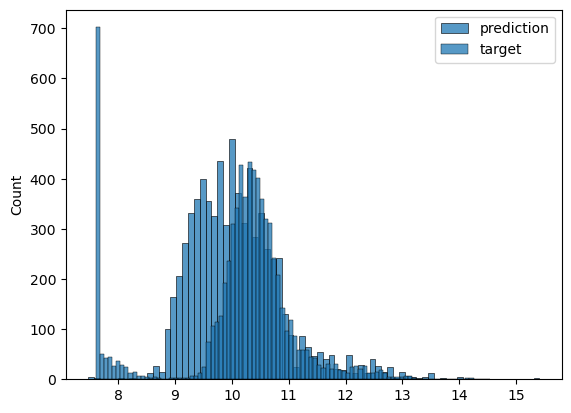

In [321]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [322]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [323]:
rmse(y_train, y_pred)

0.7554192603920132

In [324]:
df_num = df_val[base]
df_num

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2779,200.0,4.0,25,19,1385
3708,241.0,4.0,29,22,617
4794,160.0,4.0,36,26,5657
10498,290.0,6.0,34,21,204
1880,170.0,4.0,34,25,873
...,...,...,...,...,...
11123,240.0,4.0,37,25,870
5549,444.0,8.0,20,13,238
4146,332.0,8.0,23,20,1624
6337,148.0,4.0,34,24,436


In [325]:
df_num = df_num.fillna(0)
df_num

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2779,200.0,4.0,25,19,1385
3708,241.0,4.0,29,22,617
4794,160.0,4.0,36,26,5657
10498,290.0,6.0,34,21,204
1880,170.0,4.0,34,25,873
...,...,...,...,...,...
11123,240.0,4.0,37,25,870
5549,444.0,8.0,20,13,238
4146,332.0,8.0,23,20,1624
6337,148.0,4.0,34,24,436


In [326]:
X_val = df_num.values
X_val

array([[2.000e+02, 4.000e+00, 2.500e+01, 1.900e+01, 1.385e+03],
       [2.410e+02, 4.000e+00, 2.900e+01, 2.200e+01, 6.170e+02],
       [1.600e+02, 4.000e+00, 3.600e+01, 2.600e+01, 5.657e+03],
       ...,
       [3.320e+02, 8.000e+00, 2.300e+01, 2.000e+01, 1.624e+03],
       [1.480e+02, 4.000e+00, 3.400e+01, 2.400e+01, 4.360e+02],
       [2.900e+02, 6.000e+00, 2.500e+01, 1.800e+01, 1.720e+03]])

In [327]:
y_pred = w_0 + X_val.dot(w)
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [328]:
rmse(y_val, y_pred)

0.7616530991301591

In [329]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [330]:
X_train = prepare_X(df_train)
X_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   0.,   0.,   0.]])

In [331]:
w_0, w = train_linear_regression(X_train, y_train)
print(len(w))

38


In [332]:
X_val = prepare_X(df_val)
X_val.shape

(2382, 38)

In [333]:
y_pred = w_0 + X_val.dot(w)
y_pred

array([-140.,    8.,  232., ...,  236.,    4.,  -56.])

In [334]:
print('validation: ', rmse(y_val, y_pred))

validation:  174.373592159913


Instead of helping, the new features made the score a lot worse.

In [335]:
df_train.year.max()

2017

In [336]:
df_train['age'] = 2017 - df_train.year
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,5
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,26
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,2
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,2
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,2
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,3


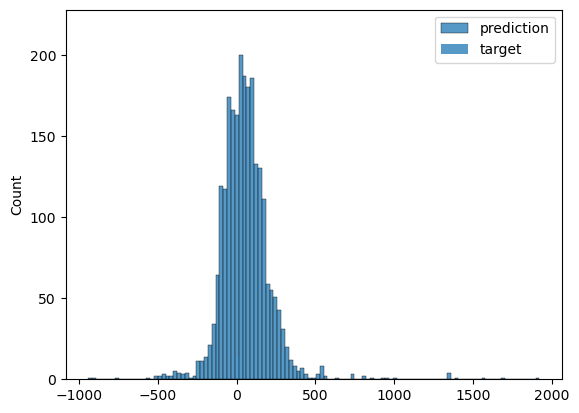

In [337]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

In [338]:
df['make'].value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [339]:
for v in df['make'].unique():
    print(v)

bmw
audi
fiat
mercedes-benz
chrysler
nissan
volvo
mazda
mitsubishi
ferrari
alfa_romeo
toyota
mclaren
maybach
pontiac
porsche
saab
gmc
hyundai
plymouth
honda
oldsmobile
suzuki
ford
cadillac
kia
bentley
chevrolet
dodge
lamborghini
lincoln
subaru
volkswagen
spyker
buick
acura
rolls-royce
maserati
lexus
aston_martin
land_rover
lotus
infiniti
scion
genesis
hummer
tesla
bugatti


In [340]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [341]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [342]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -19818095814540944.00, 14.38, 19818095814526736.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [343]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
 
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.46022676281847447
